In [1]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import pandas as pd
df=pd.read_csv('D:\\prompt Engineering\\Datasets\\FeedGrains.csv')

# FeedGrains DataSet

In [2]:
df

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1926,3,Annual,69,Commodity Market Year,8.796000
1,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1927,3,Annual,69,Commodity Market Year,9.513000
2,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1928,3,Annual,69,Commodity Market Year,12.828000
3,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1929,3,Annual,69,Commodity Market Year,14.703000
4,2,Supply and use,9.0,Barley,1,0.80,United States,1,Barley,1,Planted acreage,2,Million acres,1930,3,Annual,69,Commodity Market Year,13.581000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505977,3,Exports and imports,9.0,Barley,300,1.02,Caribbean Basin (CBERA),77,Barley products,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2023,1,Monthly,5,May,0.004767
505978,3,Exports and imports,9.0,Barley,300,1.02,Caribbean Basin (CBERA),77,Barley products,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2023,1,Monthly,6,Jun,0.060129
505979,3,Exports and imports,9.0,Barley,300,1.02,Caribbean Basin (CBERA),77,Barley products,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2023,1,Monthly,7,Jul,0.021359
505980,3,Exports and imports,9.0,Barley,300,1.02,Caribbean Basin (CBERA),77,Barley products,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2023,1,Monthly,8,Aug,0.007153


In [3]:
import numpy as np

In [4]:
df_num=df.select_dtypes(include=[np.number])

# Continous Variable Columns

In [5]:
df_num.columns

Index(['SC_Group_ID', 'SC_GroupCommod_ID', 'SC_Geography_ID', 'SortOrder',
       'SC_Commodity_ID', 'SC_Attribute_ID', 'SC_Unit_ID', 'Year_ID',
       'SC_Frequency_ID', 'Timeperiod_ID', 'Amount'],
      dtype='object')

In [6]:
df_cat=df.select_dtypes(include=['object'])

# Categorical Variable Columns

In [7]:
df_cat.columns

Index(['SC_Group_Desc', 'SC_GroupCommod_Desc', 'SC_GeographyIndented_Desc',
       'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc',
       'SC_Frequency_Desc', 'Timeperiod_Desc'],
      dtype='object')

# IMPUTATION-finding the null values

In [8]:
df_num.isnull().sum()

SC_Group_ID             0
SC_GroupCommod_ID    7282
SC_Geography_ID         0
SortOrder               0
SC_Commodity_ID         0
SC_Attribute_ID         0
SC_Unit_ID              0
Year_ID                 0
SC_Frequency_ID         0
Timeperiod_ID           0
Amount                  0
dtype: int64

# Replacing Null values with Mode or Dropping the values if there are more null values in the columns

In [9]:
df_num['SC_GroupCommod_ID'].fillna(df_num['SC_GroupCommod_ID'].value_counts().idxmax(),inplace=True)

In [10]:
df_num.isnull().sum()

SC_Group_ID          0
SC_GroupCommod_ID    0
SC_Geography_ID      0
SortOrder            0
SC_Commodity_ID      0
SC_Attribute_ID      0
SC_Unit_ID           0
Year_ID              0
SC_Frequency_ID      0
Timeperiod_ID        0
Amount               0
dtype: int64

In [11]:
df_num.columns

Index(['SC_Group_ID', 'SC_GroupCommod_ID', 'SC_Geography_ID', 'SortOrder',
       'SC_Commodity_ID', 'SC_Attribute_ID', 'SC_Unit_ID', 'Year_ID',
       'SC_Frequency_ID', 'Timeperiod_ID', 'Amount'],
      dtype='object')

# Removing the datapoints which are more than 75% and less than 25%

In [12]:
df_num['Amount'].describe()

count    5.059820e+05
mean     7.188182e+05
std      2.458086e+07
min     -1.310973e+03
25%      6.612301e-02
50%      1.664000e+00
75%      3.544414e+01
max      2.872986e+09
Name: Amount, dtype: float64

<Axes: ylabel='Amount'>

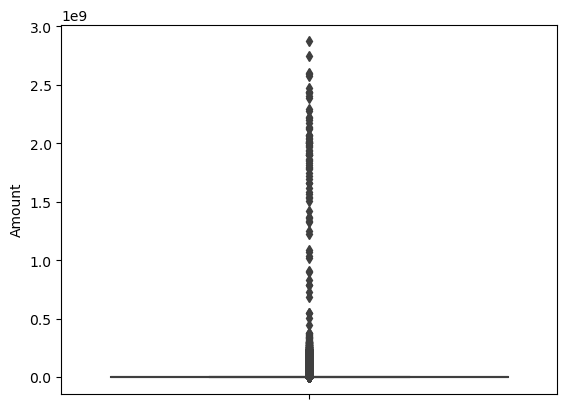

In [13]:
sns.boxplot(y=df_num['Amount'])

# Removing the datapoints which are more than 75% and less than 25%

In [14]:
df_AMO=df_num[(df_num['Amount']>0.066)&(df_num['Amount']<35.444)]

# Plotting Boxplot after Removal

<Axes: ylabel='Amount'>

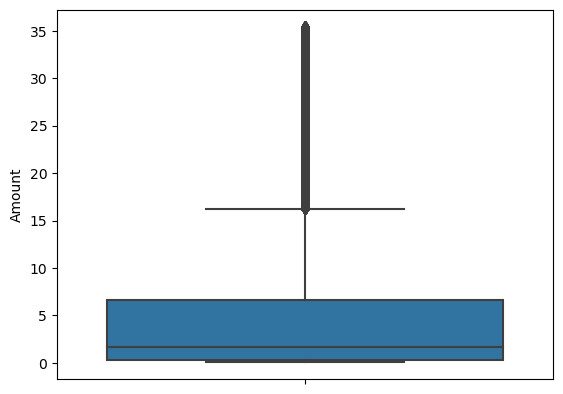

In [15]:
sns.boxplot(y=df_AMO['Amount'])

In [16]:
df_AMO['SC_Frequency_ID'].describe()

count    253059.000000
mean          1.282472
std           0.677299
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: SC_Frequency_ID, dtype: float64

# Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler 

In [18]:
sc=StandardScaler()

In [19]:
sco=sc.fit(df_AMO)

In [20]:
standard_num_scaler=sco.fit_transform(df_AMO)

<Axes: >

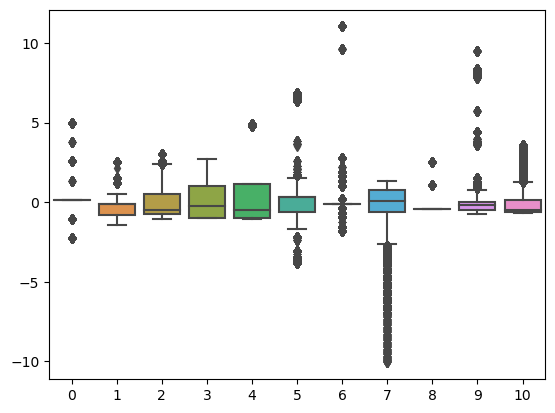

In [21]:
sns.boxplot(standard_num_scaler)

# MinMaxScaler

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mms=MinMaxScaler()

In [24]:
min_num_scaled=mms.fit_transform(df_AMO)

<Axes: >

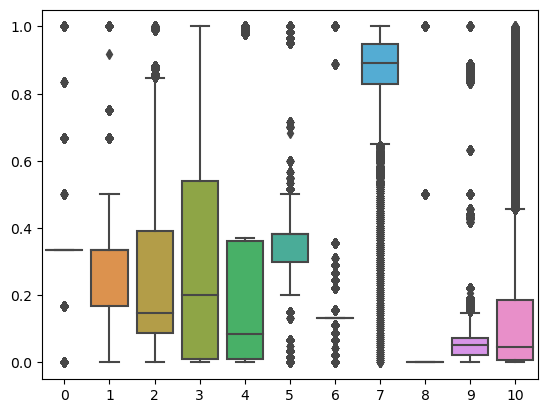

In [25]:
sns.boxplot(min_num_scaled)

# Categorical Variable Columns

In [26]:
df_cat.columns

Index(['SC_Group_Desc', 'SC_GroupCommod_Desc', 'SC_GeographyIndented_Desc',
       'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc',
       'SC_Frequency_Desc', 'Timeperiod_Desc'],
      dtype='object')

# Finding Null values in Categorical variables

In [27]:
df_cat.isnull().sum()

SC_Group_Desc                   0
SC_GroupCommod_Desc          7282
SC_GeographyIndented_Desc       0
SC_Commodity_Desc               0
SC_Attribute_Desc               0
SC_Unit_Desc                    0
SC_Frequency_Desc               0
Timeperiod_Desc                 0
dtype: int64

In [28]:
df_cat['SC_GroupCommod_Desc'].fillna(df_cat['SC_GroupCommod_Desc'].value_counts().idxmax(),inplace=True)

In [29]:
df_cat.isnull().sum()

SC_Group_Desc                0
SC_GroupCommod_Desc          0
SC_GeographyIndented_Desc    0
SC_Commodity_Desc            0
SC_Attribute_Desc            0
SC_Unit_Desc                 0
SC_Frequency_Desc            0
Timeperiod_Desc              0
dtype: int64

# Checking Unique Values

In [30]:
df_cat[['SC_Group_Desc', 'SC_GroupCommod_Desc', 'SC_GeographyIndented_Desc',
       'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc',
       'SC_Frequency_Desc', 'Timeperiod_Desc']].nunique()

SC_Group_Desc                  7
SC_GroupCommod_Desc           13
SC_GeographyIndented_Desc    272
SC_Commodity_Desc             78
SC_Attribute_Desc             41
SC_Unit_Desc                  20
SC_Frequency_Desc              3
Timeperiod_Desc               48
dtype: int64

# Label Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()

In [59]:
df_cat=df_cat.apply(le.fit_transform)

In [60]:
df_cat1.head()

,SC_Group_Desc,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,SC_Frequency_Desc,Timeperiod_Desc
0,5,1,270,3,24,13,0,7
1,5,1,270,3,24,13,0,7
2,5,1,270,3,24,13,0,7
3,5,1,270,3,24,13,0,7
4,5,1,270,3,24,13,0,7


In [61]:
df_cat=df_cat.loc[df_AMO.index.values,:]

# Concatenate Numerical Values and Categorical Values

In [62]:
d1=pd.DataFrame(min_num_scaled,columns=df_num.columns)

In [63]:
d1.reset_index(inplace=True)

In [64]:
df_cat.reset_index(inplace=True)

In [76]:
df_Final=pd.concat([d1,df_cat],axis=1)

# Final Dataset

In [77]:
df_Final

,index,SC_Group_ID,SC_GroupCommod_ID,SC_Geography_ID,SortOrder,SC_Commodity_ID,SC_Attribute_ID,SC_Unit_ID,Year_ID,SC_Frequency_ID,...,level_0,index,SC_Group_Desc,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,SC_Frequency_Desc,Timeperiod_Desc
0,0,0.166667,0.083333,0.000000,0.002737,0.00000,0.000000,0.022222,0.382166,1.0,...,0,0,5,1,270,3,24,13,0,7
1,1,0.166667,0.083333,0.000000,0.002737,0.00000,0.000000,0.022222,0.388535,1.0,...,1,1,5,1,270,3,24,13,0,7
2,2,0.166667,0.083333,0.000000,0.002737,0.00000,0.000000,0.022222,0.394904,1.0,...,2,2,5,1,270,3,24,13,0,7
3,3,0.166667,0.083333,0.000000,0.002737,0.00000,0.000000,0.022222,0.401274,1.0,...,3,3,5,1,270,3,24,13,0,7
4,4,0.166667,0.083333,0.000000,0.002737,0.00000,0.000000,0.022222,0.407643,1.0,...,4,4,5,1,270,3,24,13,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253054,253054,0.333333,0.166667,0.882006,0.003509,0.35545,0.383333,0.133333,1.000000,0.0,...,505885,505885,1,2,249,11,7,2,1,12
253055,253055,0.333333,0.166667,0.882006,0.003509,0.35545,0.383333,0.133333,1.000000,0.0,...,505886,505886,1,2,249,11,7,2,1,1
253056,253056,0.333333,0.166667,0.882006,0.003509,0.35545,0.383333,0.133333,1.000000,0.0,...,505887,505887,1,2,249,11,7,2,1,47
253057,253057,0.333333,0.083333,0.882006,0.003509,0.36019,0.300000,0.133333,0.783439,1.0,...,505899,505899,1,1,249,7,22,2,0,26


In [78]:
df_Final.shape

(253059, 22)

# Model Training 

In [79]:
Y=df_Final['Amount']

In [80]:
X=df_Final.drop(['Amount'],axis=1)

# Spliting the Data  for Training(70%) and Testing(30%)

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=50)

# Linear Regression Training Score

In [82]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
lm=linreg.fit(X_train,y_train)
lm.score(X_train,y_train)

0.10615243444077316

# DecisionTreeRegressor Training Score

In [83]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='friedman_mse')
dt1=dtr.fit(X_train,y_train)
dt1.score(X_train,y_train)

1.0

# RandomForestRegressor Training score

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50,max_depth=19)
rf1=rf.fit(X_train,y_train)
rf1.score(X_train,y_train)

0.8632621150465072

# Model Validation

In [85]:
from sklearn.metrics import r2_score

# LinearRegression  Testing Score

In [86]:
lm_y_pred=lm.predict(X_test)
r2_score(y_test,lm_y_pred)

0.10886223583406329

# DecisionTreeRegressor Testing Score

In [87]:
dt_y_pred=dt1.predict(X_test)
r2_score(y_test,dt_y_pred)

0.5734791540969433

# RandomForestRegressor Testing Score

In [88]:
rf_y_pred=rf1.predict(X_test)
r2_score(y_test,rf_y_pred)

0.7275959043942113